In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
multiple = pd.read_csv('results_multiple_seagull.csv', index_col=False)
multiple

,Unnamed: 0,model,trainc1,trainc2,testc1,testc2
0,0,unetfpnsum,0.998324,0.644634,0.997604,0.653484
1,1,unetfpn,0.998463,0.674340,0.997786,0.678891
2,2,unetfpnconcat,0.998404,0.654317,0.997692,0.658820
3,3,fcnfpn,0.998144,0.526178,0.997307,0.529459


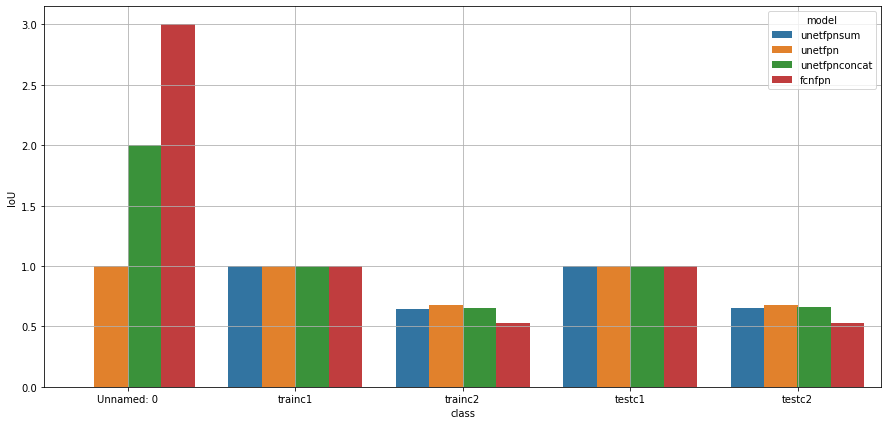

In [3]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=multiple.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [4]:
multiple.iloc[:,2:4]

,trainc1,trainc2
0,0.998324,0.644634
1,0.998463,0.674340
2,0.998404,0.654317
3,0.998144,0.526178


In [5]:
multiple.iloc[:,4:]

,testc1,testc2
0,0.997604,0.653484
1,0.997786,0.678891
2,0.997692,0.658820
3,0.997307,0.529459


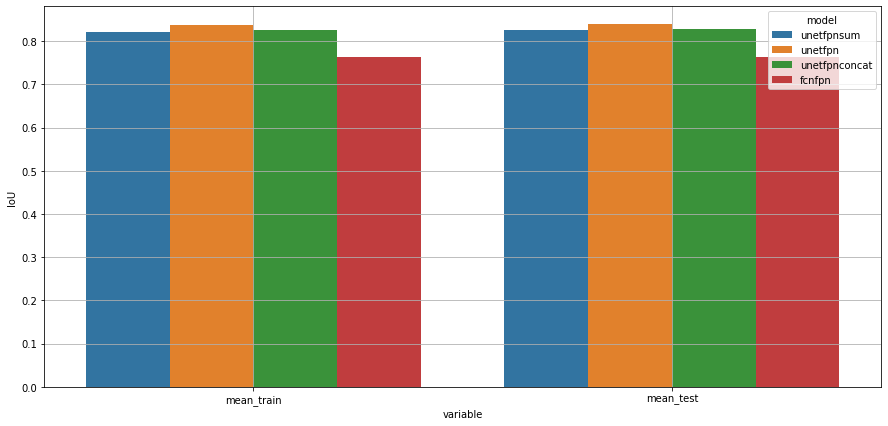

In [6]:
mean_results = multiple.copy()
mean_results['mean_train'] = multiple.iloc[:,2:4].mean(axis=1)
mean_results['mean_test'] = multiple.iloc[:,4:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [7]:
mean_results

,mean_train,mean_test,model
0,0.821479,0.825544,unetfpnsum
1,0.836402,0.838338,unetfpn
2,0.826360,0.828256,unetfpnconcat
3,0.762161,0.763383,fcnfpn
